In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v3 import *
from utils import *
from graph import *
from preprocessing import *
#from gmr_ import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

from pycupid import *
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

***

In [2]:
fits_path = "../data/cubes/Orion.methanol.cbc.contsub.image.fits"
data,wcs,hdu,freq = load_data(fits_path)

print(wcs)
print("\nShape of array:", data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.80979166667  -5.376388888889  229763161321.4  
CRPIX : 51.0  51.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  
NAXIS : 100  100  41

Shape of array: (41, 100, 100)


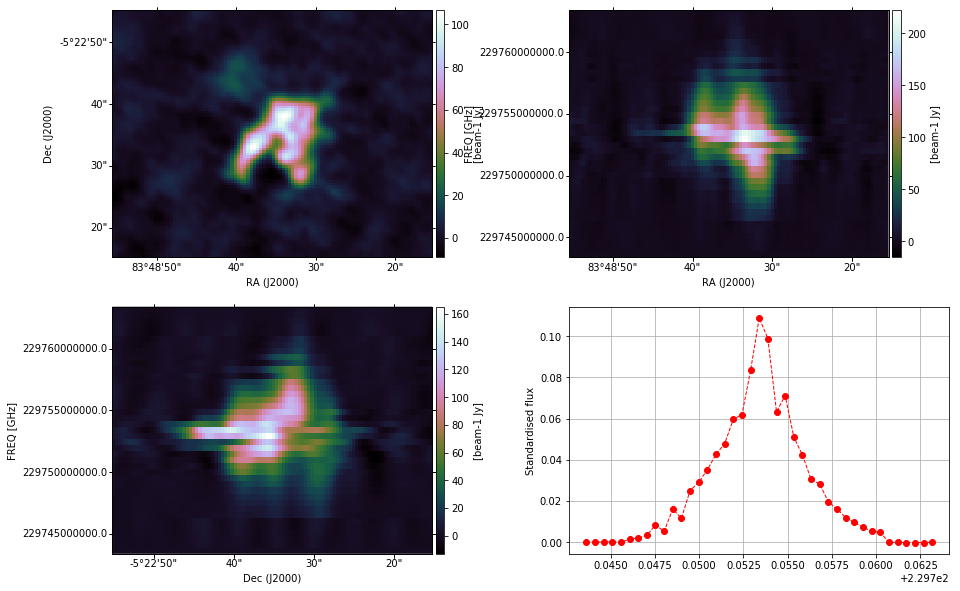

In [3]:
cube_plot(data, wcs=wcs, freq=freq, unit=hdu.header["BUNIT"])

In [4]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
rms = estimate_rms(data)
hdmc = HDMClouds(data, freq=freq, back_level=rms, wcs=wcs, verbose=False, n_center=500)

[INFO] Number of usable pixels: 17411
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


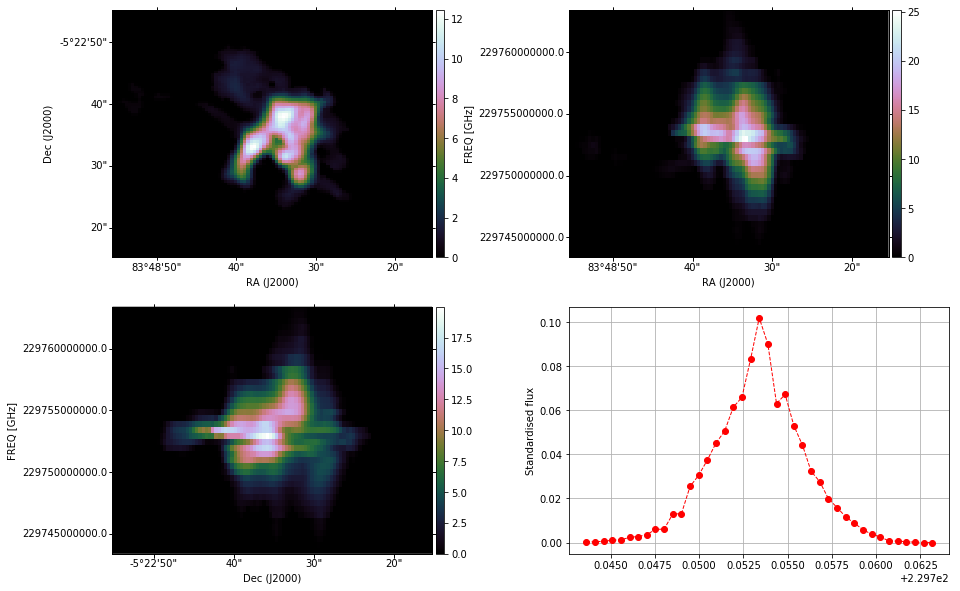

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


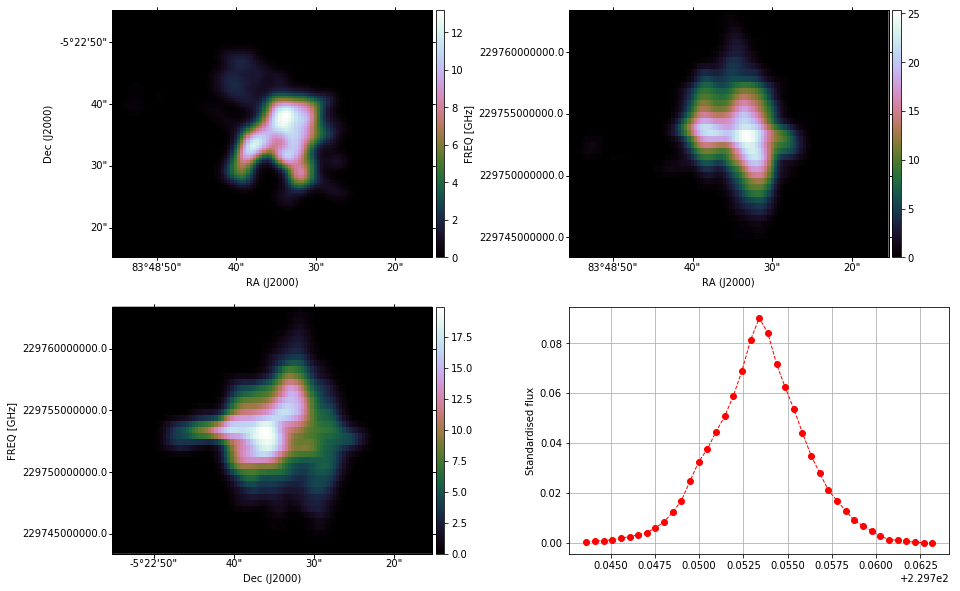

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


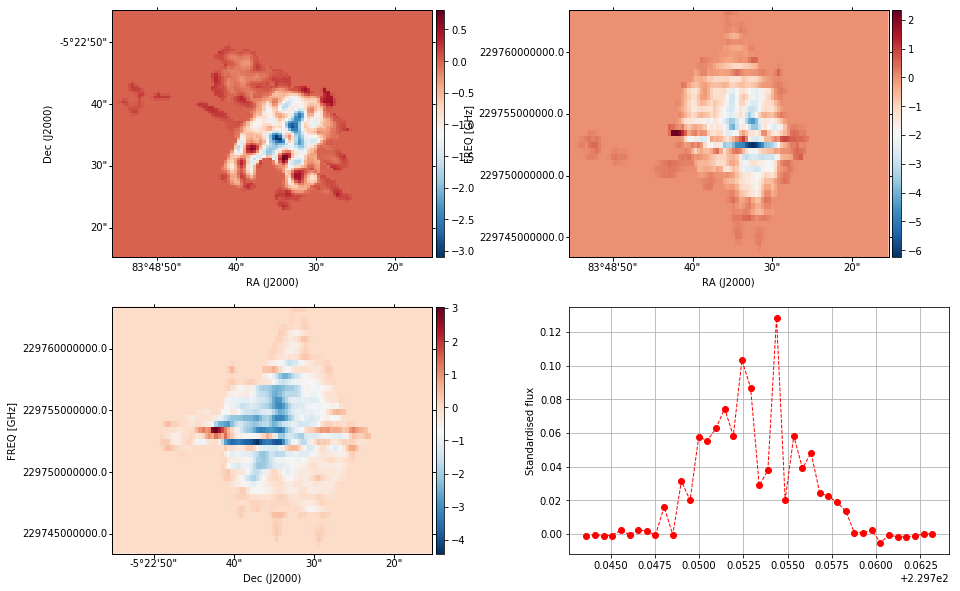

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.0167347762031843
Inf norm of residual: 0.36317346975909026
Variance of residual: 0.00027746310399513405
Normalized flux addition: 0.1566647301067019
Normalized flux lost: 0.039191363010482864


In [5]:
hdmc.get_residual_stats();

## Profiling Results

In [6]:
print(open('gmr_v0_prof', 'r').read())

         112323315 function calls (112289245 primitive calls) in 225.534 seconds

   Ordered by: internal time
   List reduced from 1566 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    16911   98.059    0.006   98.059    0.006 gmr.py:211(less_dissimilar)
    16911   45.030    0.003   45.030    0.003 gmr.py:262(update_structs)
        2   16.202    8.101   59.505   29.752 utils.py:185(compute_neighbors)
   275232   14.725    0.000   14.725    0.000 {built-in method numpy.core.multiarray.array}
   411502   12.439    0.000   12.439    0.000 {method 'sort' of 'list' objects}
107230839    8.050    0.000    8.050    0.000 {method 'append' of 'list' objects}
    16915    6.256    0.000    7.189    0.000 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
   411500    4.938    0.000    4.938    0.000 {method 'tolist' of 'numpy.ndarray' objects}
        2    3.482    1.741    3.482    1.741 gmr.py:198(build_diss_

## GM parameters optimization

In [7]:
%%prun -s tottime -q -l 30 -T gma_prof
hdmc.build_gmr()

 
*** Profile printout saved to text file 'gma_prof'. 


----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


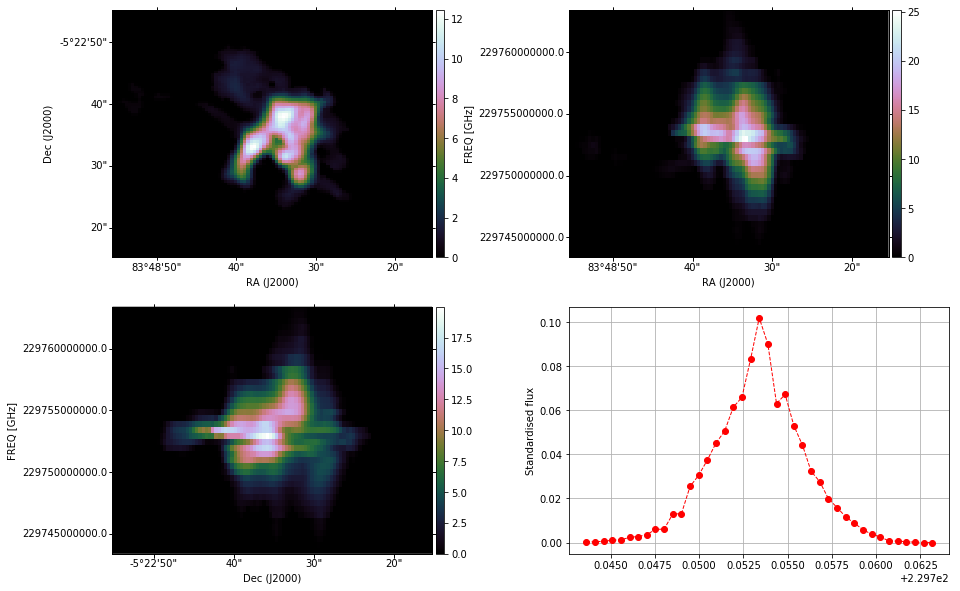

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


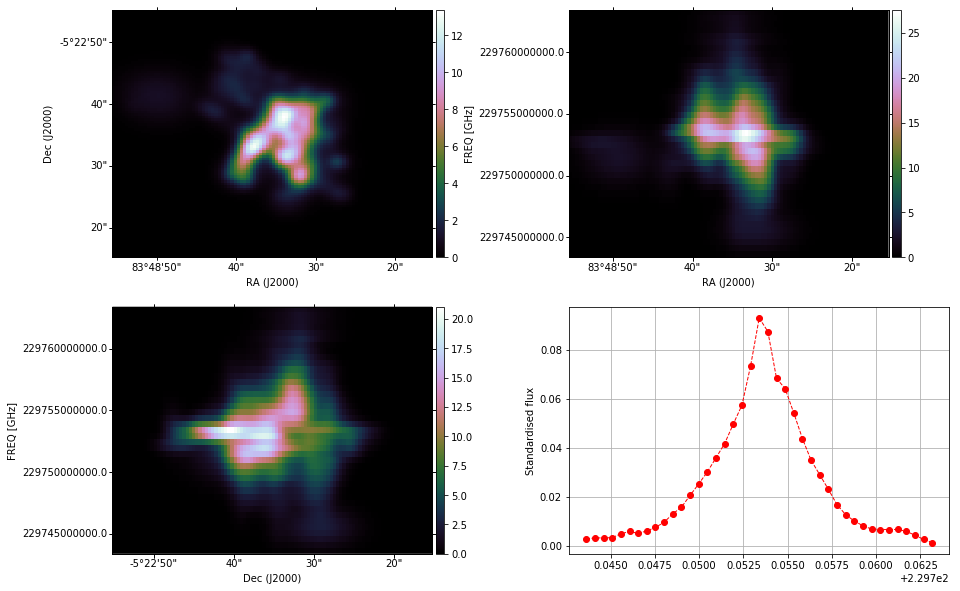

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


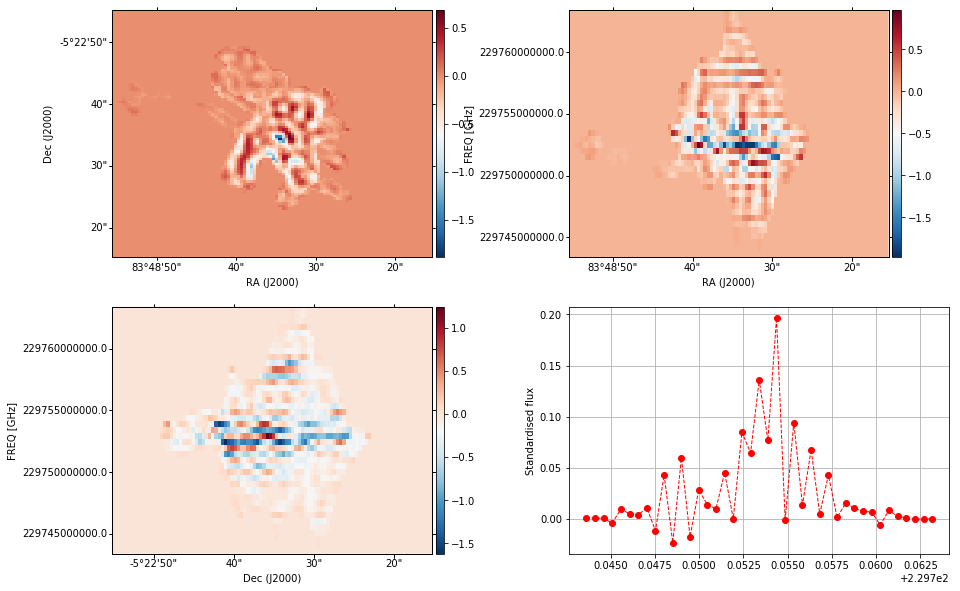

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.008643071782083756
Inf norm of residual: 0.2517670603512581
Variance of residual: 7.453915740267119e-05
Normalized flux addition: 0.06285698112590773
Normalized flux lost: 0.03333656658528373


In [8]:
hdmc.get_residual_stats(plot=True);

In [9]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 300200.
nfev: 300231
xtol: 1e-07
ftol: 1e-07


In [10]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 3119.775254011154


In [11]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

ValueError: too many values to unpack (expected 2)

***

In [12]:
print(open('gma_prof', 'r').read())

         21020920 function calls (21018708 primitive calls) in 3119.776 seconds

   Ordered by: internal time
   List reduced from 135 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   300233 2218.385    0.007 2218.385    0.007 {fgm_eval.gm_eval3d_3}
        1  772.056  772.056 3119.751 3119.751 {built-in method scipy.optimize._minpack._lmdif}
   900699   34.835    0.000   65.491    0.000 necompiler.py:751(evaluate)
   300233   30.640    0.000   48.715    0.000 hdmclouds_v3.py:34(d1psi1)
   600466   19.898    0.000   19.898    0.000 utils.py:149(sig_mapping)
   300233   11.749    0.000 2347.718    0.008 hdmclouds_v3.py:367(F)
   900702    8.421    0.000   10.453    0.000 necompiler.py:535(getContext)
   900699    7.610    0.000   11.795    0.000 necompiler.py:726(getArguments)
   900702    2.848    0.000    2.848    0.000 {built-in method builtins.sorted}
  1801398    2.811    0.000    2.811    0.000 necompiler.py:687(getType)
  1